In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DataSets/Global Internet users/Final.csv')

In [3]:
df.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB


In [27]:
df.shape

(8867, 8)

In [28]:
df.isnull().sum()

Unnamed: 0                0
Entity                    0
Code                      0
Year                      0
Cellular Subscription     0
Internet Users(%)         0
No. of Internet Users     0
Broadband Subscription    0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.describe()

,Unnamed: 0,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
count,8867.000000,8867.000000,8867.000000,8867.000000,8.867000e+03,8867.000000
mean,4433.000000,2000.151799,39.989614,17.043606,1.089138e+07,4.440695
std,2559.826752,11.812151,51.981410,26.883498,1.248841e+08,9.755705
min,0.000000,1980.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2216.500000,1990.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,4433.000000,2000.000000,5.501357,0.855662,1.004700e+04,0.000000
75%,6649.500000,2010.000000,82.231594,25.449939,8.664195e+05,2.007603
max,8866.000000,2020.000000,436.103027,100.000000,4.699886e+09,78.524361


### Increase in the users over the years

In [31]:
a = df.groupby('Year')['No. of Internet Users'].mean().reset_index()

In [32]:
a = df.groupby('Year')['No. of Internet Users'].mean().reset_index()

<AxesSubplot:xlabel='Year', ylabel='No. of Internet Users'>

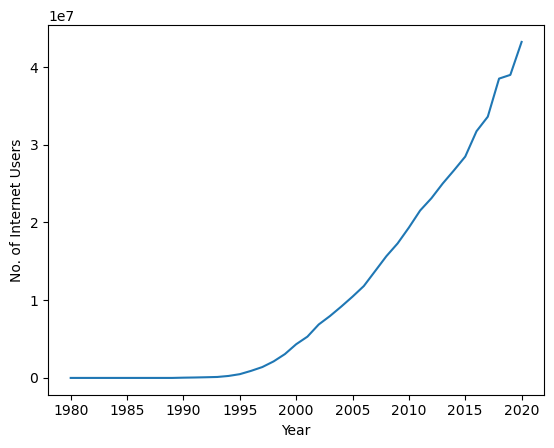

In [33]:
sns.lineplot(data = a, x = 'Year', y = 'No. of Internet Users' )

### Top 10 counties with highest average of users

<AxesSubplot:xlabel='Entity', ylabel='No. of Internet Users'>

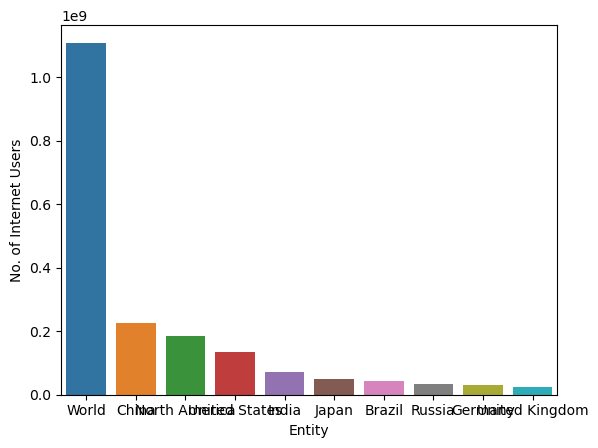

In [34]:
d = df.groupby('Entity')['No. of Internet Users'].mean().round().nlargest(10).reset_index()
sns.barplot(data=d, x = 'Entity', y = 'No. of Internet Users' )

In [35]:
d = d.drop(d[(d['Entity']=='World')].index)
d = d.drop(d[(d['Entity']=='North America')].index)
d

,Entity,No. of Internet Users
1,China,226095158.0
3,United States,133425326.0
4,India,71766932.0
5,Japan,49804800.0
6,Brazil,42340844.0
7,Russia,33302832.0
8,Germany,31658207.0
9,United Kingdom,25731958.0


[Text(0, 0, '2.26095e+08'),
 Text(0, 0, '1.33425e+08'),
 Text(0, 0, '7.17669e+07'),
 Text(0, 0, '4.98048e+07'),
 Text(0, 0, '4.23408e+07'),
 Text(0, 0, '3.33028e+07'),
 Text(0, 0, '3.16582e+07'),
 Text(0, 0, '2.5732e+07')]

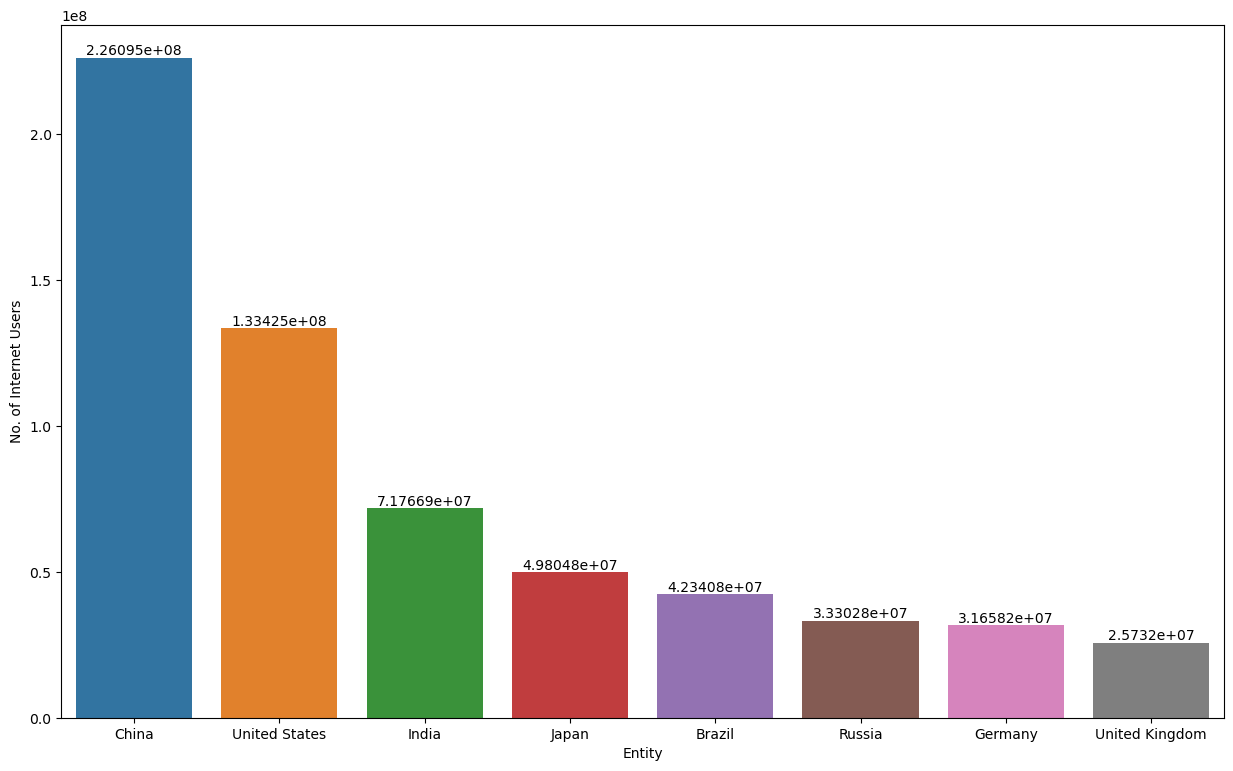

In [36]:
fig,ax = plt.subplots(figsize=(15,9))
sns.barplot(data=d, x = 'Entity', y = 'No. of Internet Users' )
ax.bar_label(ax.containers[0])

### China has the most number of internet users

### Top 10 countries with highest average users in 2020

In [37]:
u = df[df['Year']==2020].groupby('Entity')['No. of Internet Users'].mean().round().nlargest(10).reset_index()
u = u.drop(u[(u['Entity']=='World')].index)
u = u.drop(u[(u['Entity']=='North America')].index)

[Text(0, 0, '1.00322e+09'),
 Text(0, 0, '6.00446e+08'),
 Text(0, 0, '3.05371e+08'),
 Text(0, 0, '1.7342e+08'),
 Text(0, 0, '1.4606e+08'),
 Text(0, 0, '1.23767e+08'),
 Text(0, 0, '1.12995e+08'),
 Text(0, 0, '9.06787e+07')]

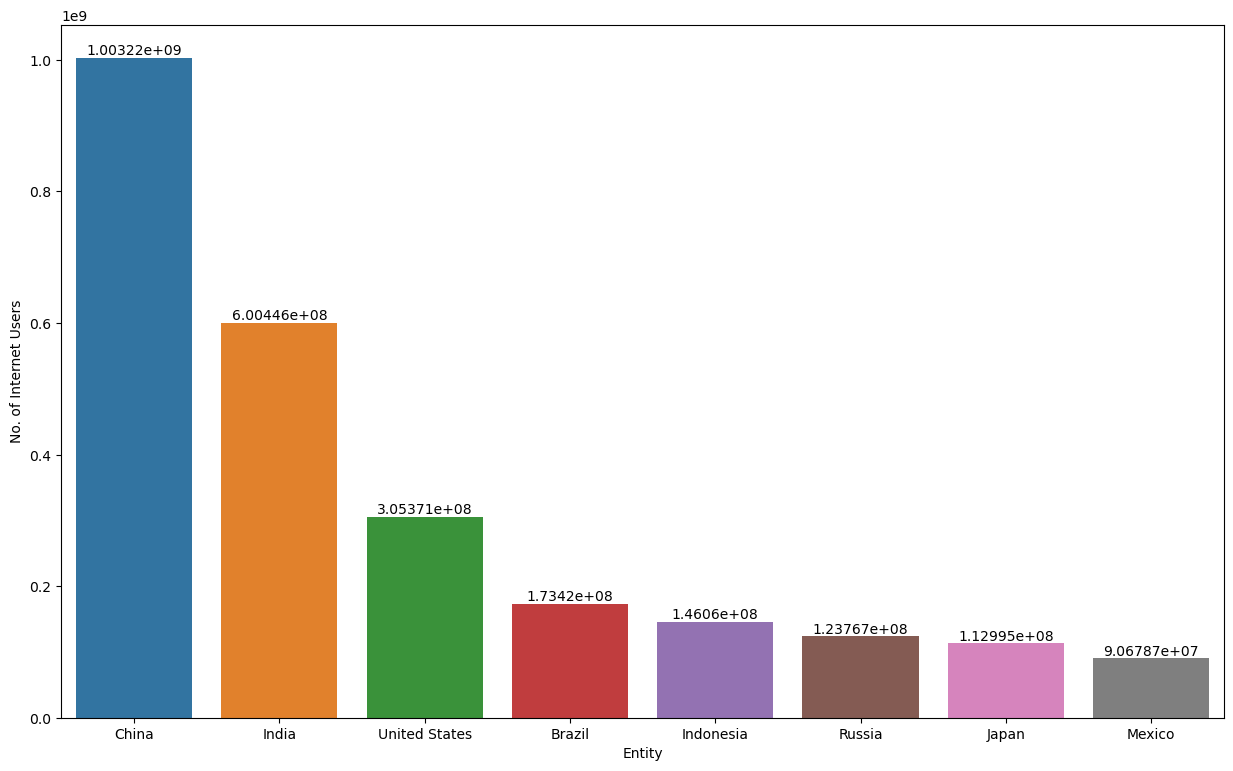

In [38]:
fig, ax = plt.subplots(figsize = (15,9))
sns.barplot(data = u, x = 'Entity', y = 'No. of Internet Users')
ax.bar_label(ax.containers[0])

### Here we can see China and India have the most number of users in 2020